# What is the Relationship Between an MLB Teams’ Wins in a Season and Their Team Fielding, Pitching, and/or Hitting Statistics?


## What is my dataset?
My data set is a collection of baseball statistics from the Lahmnan database for baseball metrics. The earliest element of the data set originates from the 1878 season. The data set includes team hitting, fielding, and pitching statistics from both American League and National League teams. The title of the file is Teams.CSV

http://www.seanlahman.com/baseball-archive/statistics/

## Project Goals

From this project, I desire to learn about the correlation between different team statistics and wins. My hope is to determine which statistics have the greatest correlation with wins. I would also like to generate multiple linear regression models from hitting, fielding and pitching statistics and determine which model best fits the data. This model could then be used to predict wins based on statistical categories.


## Assessing Accuracy

To determine the accuracy of my correllation scatter plots for each statistical category, I believe the best strategy is to think about them logically. The multiple linear regression model accuracy is a little more difficult to assess. From my outside knowledge, I feel as if the pitching statistic model will fit the data best, followed by the hitting data, and then the fielding data. I will use r^2 to assess whether or not my multiple linear regression model fits my data well. 

## What I Imported?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

%matplotlib inline

df = pd.read_csv('Teams.csv', header = None)

## Cleaning Up My Data

I first needed to adjust the header names

In [2]:
headers = df.iloc[0]
new_df  = pd.DataFrame(df.values[1:], columns=headers)

1973 is the year that the designated hitter was introduced into the American League. A crucial part of the game and something that exists now, it is important to use this data to create my models. 1994 was an incomplete season, so I also removed that data from the dataframe.

In [3]:
new_df['yearID'] = new_df['yearID'].astype(int)
invalid1 = new_df[(new_df['yearID'] < 1995)].index
new_df.drop(invalid1, inplace=True)

I also removed data from the 2020 season from the dataframe because this was not a complete season and may cause issues with the accuracy of the models. The normal baseball season is 162 games long, so I only included years where that was achieved.

In [4]:
invalid2 = new_df[(new_df['yearID'] == 2020)].index
new_df.drop(invalid2, inplace=True)

Converted all eligible values in the dataframe from strings to numbers

In [5]:
new_df = new_df.apply(pd.to_numeric, errors = "ignore")
new_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72,90,54,...,113,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72,71,73,...,141,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72,86,58,...,151,0.978,Boston Red Sox,Fenway Park II,2164410,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72,78,67,...,120,0.982,California Angels,Anaheim Stadium,1748680,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72,68,76,...,131,0.980,Chicago White Sox,Comiskey Park II,1609773,96,95,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,NL,SLN,STL,C,1,162,81,91,71,...,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81,96,66,...,126,0.985,Tampa Bay Rays,Tropicana Field,1178735,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81,78,84,...,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81,67,95,...,141,0.984,Toronto Blue Jays,Rogers Centre,1750114,97,98,TOR,TOR,TOR


# Analyzing Hitting Statistics and Wins

Created a table of only hitting statistics

In [6]:
hitting = pd.DataFrame(new_df, columns=["yearID", "teamID",'R', 'H', "2B", "3B", "HR", "BB","HBP","SO", 'W'])

## Defining the Abbreviations
| Abbreviation | Definition  |
|---|---|
| yearID | Season Year  |
| teamID |  Team Name |
| R  | Runs  |
| H  | Hits  |
| 2B  | Doubles  |
| 3B  | Triples  |
| HR  | Home Runs  |
| BB  | Walks  |
| HBP  | Hit By Pitch  |
| SO  | Strikeouts (Batters) |
| W  | Wins  |

# Hitting Statistic Correlation Scatter Plots

The same code was used to create each correlation tables.

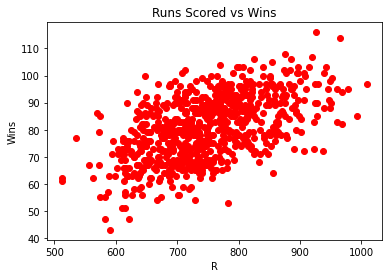

The correlation between Runs Scored and wins is 0.5480479446058237



In [7]:
fig = plt.figure()
plt.scatter(hitting["R"], hitting["W"], c="red")
plt.title("Runs Scored vs Wins")
plt.xlabel("R")
plt.ylabel("Wins")
plt.show()
print("The correlation between Runs Scored and wins is", hitting["R"].corr(hitting["W"]))
print()

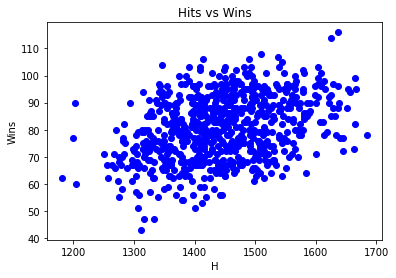

The correlation between Hits and Wins is 0.3686996269707523



In [8]:
fig1 = plt.figure()
plt.scatter(hitting["H"], hitting["W"], c="blue")
plt.title("Hits vs Wins")
plt.xlabel("H")
plt.ylabel("Wins")
plt.show()
print("The correlation between Hits and Wins is", hitting["H"].corr(hitting["W"]))
print()


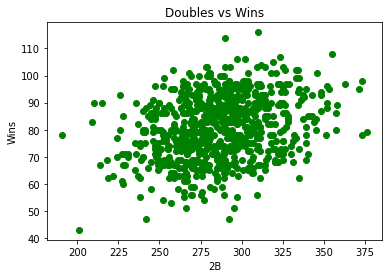

The correlation between Doubles and Wins is 0.2903400529118715



In [9]:
fig2 = plt.figure()
plt.scatter(hitting["2B"], hitting["W"], c="green")
plt.title("Doubles vs Wins")
plt.xlabel("2B")
plt.ylabel("Wins")
plt.show()
print("The correlation between Doubles and Wins is", hitting["2B"].corr(hitting["W"]))
print()

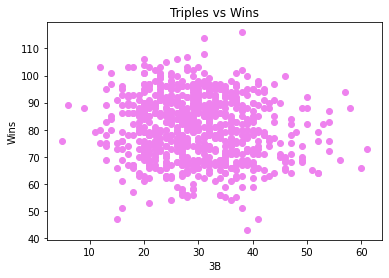

The correlation between Triples and Wins is -0.10671279430997292



In [10]:
fig3 = plt.figure()
plt.scatter(hitting["3B"], hitting["W"], c="violet")
plt.title("Triples vs Wins")
plt.xlabel("3B")
plt.ylabel("Wins")
plt.show()
print("The correlation between Triples and Wins is", hitting["3B"].corr(hitting["W"]))
print()

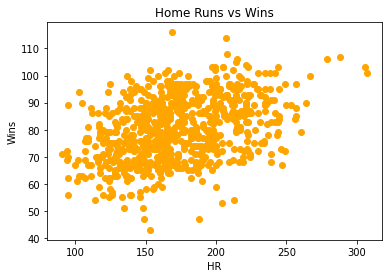

The correlation between Home Runs and Wins is 0.4127278572752871



In [11]:
fig4 = plt.figure()
plt.scatter(hitting["HR"], hitting["W"], c="orange")
plt.title("Home Runs vs Wins")
plt.xlabel("HR")
plt.ylabel("Wins")
plt.show()
print("The correlation between Home Runs and Wins is", hitting["HR"].corr(hitting["W"]))
print()


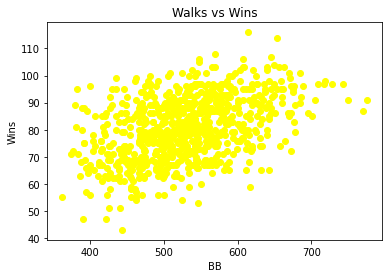

The correlation between Walks and Wins is 0.4442531111918402



In [12]:
fig5 = plt.figure()
plt.scatter(hitting["BB"], hitting["W"], c="yellow")
plt.title("Walks vs Wins")
plt.xlabel("BB")
plt.ylabel("Wins")
plt.show()
print("The correlation between Walks and Wins is", hitting["BB"].corr(hitting["W"]))
print()

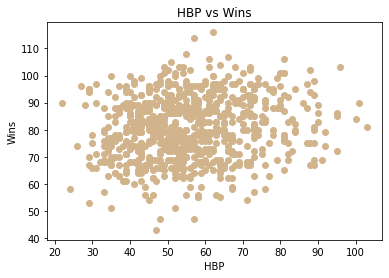

The correlation between Hit By Pitch and Wins is 0.15703381699011032



In [13]:
fig1 = plt.figure()
plt.scatter(hitting["HBP"], hitting["W"], c="tan")
plt.title("HBP vs Wins")
plt.xlabel("HBP")
plt.ylabel("Wins")
plt.show()
print("The correlation between Hit By Pitch and Wins is", hitting["HBP"].corr(hitting["W"]))
print()

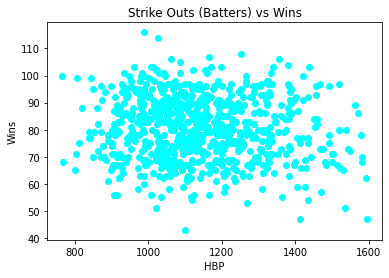

The correlation between Strikeouts and Wins is 0.15703381699011032



In [14]:
fig1 = plt.figure()
plt.scatter(hitting["SO"], hitting["W"], c="cyan")
plt.title("Strike Outs (Batters) vs Wins")
plt.xlabel("HBP")
plt.ylabel("Wins")
plt.show()
print("The correlation between Strikeouts and Wins is", hitting["HBP"].corr(hitting["W"]))
print()

# Multiple Linear Regression Using Hitting Statistics

In [15]:
# create X and y
X = new_df[['R', 'H', "2B", "3B", "HR", "BB","HBP", "SO"]]
Y = new_df['W']


In [16]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [17]:
# print the coefficients
print("Regression Intercept:", reg.intercept_)
coeffs = list(zip(X, reg.coef_))
for i in range(len(coeffs)):
  print(coeffs[i])
print(f'R Squared: {reg.score(X, Y)}')

Regression Intercept: 24.09698569141345
('R', 0.06218339673747315)
('H', -0.00044617344408804)
('2B', -0.006205917469306533)
('3B', -0.12776368109076988)
('HR', 0.0055774607174262445)
('BB', 0.022665338972760737)
('HBP', 0.04663647091092677)
('SO', 0.0006198152389934367)
R Squared: 0.3312009268375299


## Analysis

The regression model created has an r^2 value of only .331. This value illustrates that the regression line created does not fit the data very well. Because of this, the model would not create a very accurate prediction of an MLB teams' wins in a season.

# Analyzing Pitching Statistics and Wins

Created a table of only pitching statistics

In [18]:
pitching = pd.DataFrame(new_df, columns=["yearID", "teamID",'RA', 'ER', "ERA", "CG", "SHO", 
                                         "SV", "SOA",'W' ])
pitching

,yearID,teamID,RA,ER,ERA,CG,SHO,SV,SOA,W
2181,1995,ATL,540,494,3.44,18,11,34,1087,90
2182,1995,BAL,640,607,4.31,19,10,29,930,71
2183,1995,BOS,698,631,4.39,7,9,39,888,86
2184,1995,CAL,697,645,4.52,8,9,42,901,78
2185,1995,CHA,758,693,4.85,12,4,36,892,68
...,...,...,...,...,...,...,...,...,...,...
2920,2019,SLN,662,609,3.80,1,14,52,1399,91
2921,2019,TBA,656,598,3.65,0,12,46,1621,96
2922,2019,TEX,878,808,5.06,4,9,33,1379,78
2923,2019,TOR,828,767,4.79,1,7,33,1332,67


## Defining the Abbreviations
| Abbreviation | Definition  |
|---|---|
| yearID | Season Year  |
| teamID |  Team Name |
| RA  | Runs Against |
| ER  | Earned Runs  |
| ERA  | Earned Run Average  |
| SHO  | Shut Outs  |
| SV  | Save  |
| SOA  | Strikeouts (Pitchers  |
| W  | Wins  |

# Pitching Statistic Correlation Tables

The same code was used to create each correlation tables.

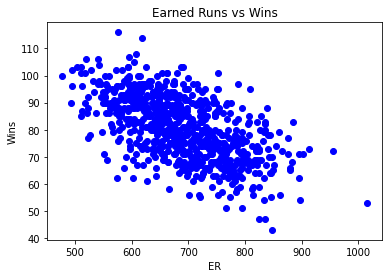

The correlation between Earned Runs and Wins is -0.5916528094013952



In [19]:
fig1 = plt.figure()
plt.scatter(pitching["ER"], pitching["W"], c="blue")
plt.title("Earned Runs vs Wins")
plt.xlabel("ER")
plt.ylabel("Wins")
plt.show()
print("The correlation between Earned Runs and Wins is", pitching["ER"].corr(pitching["W"]))
print()

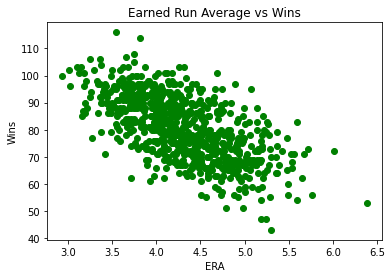

The correlation between Earned Run Average and Wins is -0.6332319979983781



In [20]:
fig3 = plt.figure()
plt.scatter(pitching["ERA"], pitching["W"], c="green")
plt.title("Earned Run Average vs Wins")
plt.xlabel("ERA")
plt.ylabel("Wins")
plt.show()
print("The correlation between Earned Run Average and Wins is", pitching["ERA"].corr(pitching["W"]))
print()

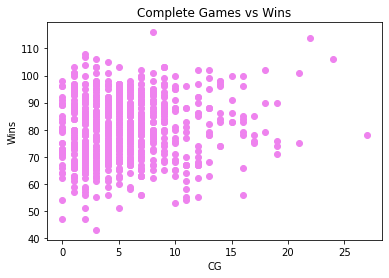

The correlation between Complete Games and Wins is 0.1091185782825451



In [21]:
fig3 = plt.figure()
plt.scatter(pitching["CG"], pitching["W"], c="violet")
plt.title("Complete Games vs Wins")
plt.xlabel("CG")
plt.ylabel("Wins")
plt.show()
print("The correlation between Complete Games and Wins is", pitching["CG"].corr(pitching["W"]))
print()

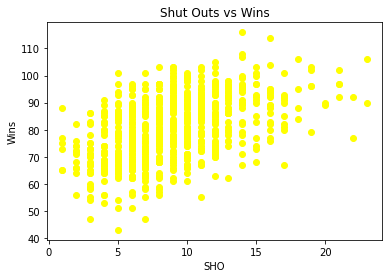

The correlation between Shut Outs and Wins is 0.4847569118969013



In [22]:
fig5 = plt.figure()
plt.scatter(pitching["SHO"], pitching["W"], c="yellow")
plt.title("Shut Outs vs Wins")
plt.xlabel("SHO")
plt.ylabel("Wins")
plt.show()
print("The correlation between Shut Outs and Wins is", pitching["SHO"].corr(pitching["W"]))
print()

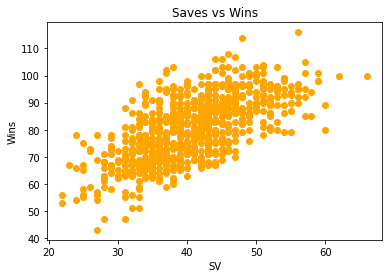

The correlation between Saves and Wins is 0.6586577309695238



In [23]:
fig6 = plt.figure()
plt.scatter(pitching["SV"], pitching["W"], c="orange")
plt.title("Saves vs Wins")
plt.xlabel("SV")
plt.ylabel("Wins")
plt.show()
print("The correlation between Saves and Wins is", pitching["SV"].corr(pitching["W"]))
print()


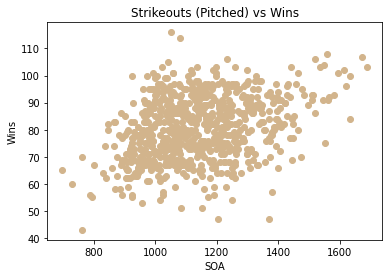

The correlation between Strike Outs (Pitched) and Wins is 0.3520229726627095



In [24]:
fig7 = plt.figure()
plt.scatter(pitching["SOA"], pitching["W"], c="tan")
plt.title("Strikeouts (Pitched) vs Wins")
plt.xlabel("SOA")
plt.ylabel("Wins")
plt.show()
print("The correlation between Strike Outs (Pitched) and Wins is", pitching["SOA"].corr(pitching["W"]))
print()


## Multiple Linear Regression Using Pitching Statistics

In [25]:
# create X and y
X2 = pitching[['RA',"ER", "ERA", "CG", "SHO", "SV", "SOA"]]
Y2 = pitching['W']

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X2,Y2)

LinearRegression()

In [27]:
# print the coefficients
print("Regression Intercept:", reg.intercept_)
coeffs = list(zip(X2, reg.coef_))
for i in range(len(coeffs)):
  print(coeffs[i])
print(f'R Squared: {reg.score(X2, Y2)}')

Regression Intercept: 66.28650790930256
('RA', -0.08632823757295575)
('ER', 0.1785354996211696)
('ERA', -19.98090635652187)
('CG', 0.6236587252848683)
('SHO', 0.09668733907094136)
('SV', 0.748268681975757)
('SOA', 0.006470488301293917)
R Squared: 0.6088562641365387


### Analysis

The multiple linear regression model created using pitching statistics and wins has an r^2 value of .6089. This model fits the data much better than the hitting statistics model and provides a slightly more accurate predictor of wins. The r^2 value still isn't high enough to say that the regression line fits the data well.

# Analyzing Fielding Statistics and Wins

Created a table of only fielding statistics

In [28]:
fielding = pd.DataFrame(new_df, columns=["yearID", "teamID", "E", "DP","FP",'W'])
fielding

,yearID,teamID,E,DP,FP,W
2181,1995,ATL,100,113,0.982,90
2182,1995,BAL,72,141,0.986,71
2183,1995,BOS,120,151,0.978,86
2184,1995,CAL,95,120,0.982,78
2185,1995,CHA,108,131,0.980,68
...,...,...,...,...,...,...
2920,2019,SLN,66,168,0.989,91
2921,2019,TBA,87,126,0.985,96
2922,2019,TEX,105,143,0.982,78
2923,2019,TOR,96,141,0.984,67


## Defining the Abbreviations
| Abbreviation | Definition  |
|---|---|
| yearID | Season Year  |
| teamID |  Team Name |
| E  | Errors |
| DP  | Double Playa  |
| FP  | Fielding Percentage  |
| W  | Wins  |

# Fielding Statistic Correlation Tables

The same code was used to create each correlation tables.

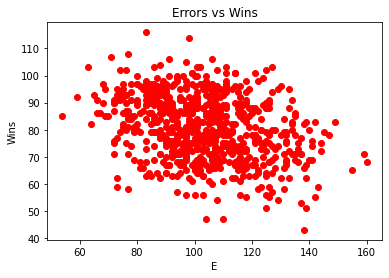

The correlation between Errors and Wins is -0.3094959699419874



In [29]:
fig = plt.figure()
plt.scatter(fielding["E"], fielding["W"], c="red")
plt.title("Errors vs Wins")
plt.xlabel("E")
plt.ylabel("Wins")
plt.show()
print("The correlation between Errors and Wins is", fielding["E"].corr(fielding["W"]))
print()

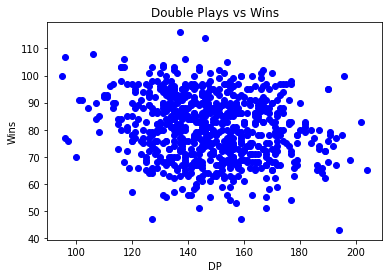

The correlation between Double Plays and Wins is -0.1875561660126608



In [30]:
fig1 = plt.figure()
plt.scatter(fielding["DP"], fielding["W"], c="blue")
plt.title("Double Plays vs Wins")
plt.xlabel("DP")
plt.ylabel("Wins")
plt.show()
print("The correlation between Double Plays and Wins is", fielding["DP"].corr(fielding["W"]))
print()


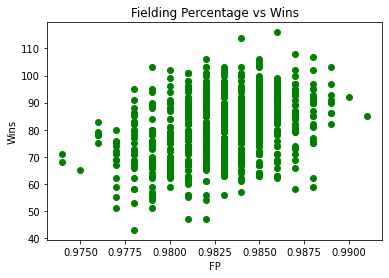

The correlation between Fielding Percentage and Wins is 0.33968657547553416



In [31]:
fig2 = plt.figure()
plt.scatter(fielding["FP"], fielding["W"], c="green")
plt.title("Fielding Percentage vs Wins")
plt.xlabel("FP")
plt.ylabel("Wins")
plt.show()
print("The correlation between Fielding Percentage and Wins is", fielding["FP"].corr(fielding["W"]))
print()

## Multiple Linear Regression Using Fielding Statistics

In [32]:
# create X and y
X3 = fielding[["E", "DP","FP"]]
Y3 = fielding['W']

In [33]:
reg = linear_model.LinearRegression()
reg.fit(X3,Y3)

LinearRegression()

In [34]:
# print the coefficients
print("Regression Intercept:", reg.intercept_)
coeffs = list(zip(X3, reg.coef_))
for i in range(len(coeffs)):
  print(coeffs[i])
print(f'R Squared: {reg.score(X3, Y3)}')

Regression Intercept: -5269.271512876762
('E', 0.671317893306186)
('DP', -0.14958939770312352)
('FP', 5394.850471291496)
R Squared: 0.1759750717598867


## Analysis

The regression line produced for the fielding statistics fits the data horrible, which indicated there probably isn't a linear relationship between fielding statistics and wins. The r^2 value for this model is .1748. Based on the results of the fielding, pitching and hitting statistic models, an adjustment of feautures is necessary to create a regression line that fits the data and is able to predict wins.

# Creating A Better Fit
The reliance on one statistical area to provide a model for predicting an MLB teams' wins for the regular season has not proven to be accurate. In order to improve my results, I am going to implement multiple linear regression using statistics from hitting, pitching and fielding, in hopes of providing a regression line that better fits the data.

In [35]:
# create X and y
X4 = new_df[["R", "H", "ERA","E","SV", "DP","FP"]]
Y4 = new_df['W']

In [36]:
reg = linear_model.LinearRegression()
reg.fit(X4,Y4)

LinearRegression()

In [37]:
# print the coefficients
print("Regression Intercept:", reg.intercept_)
coeffs = list(zip(X4, reg.coef_))
for i in range(len(coeffs)):
  print(coeffs[i])
print(f'R Squared: {reg.score(X4, Y4)}')

Regression Intercept: 180.7406875065444
('R', 0.08859085155011034)
('H', -0.000631003733350885)
('ERA', -12.973525159006021)
('E', -0.07510568266771409)
('SV', 0.4050532986912972)
('DP', -0.0005331837891474497)
('FP', -120.36236298124307)
R Squared: 0.9251996133905791


The r^2 for this model is much higher than the others. I chose features from each category that had the highest correlation to wins, which explains the improvement in fitting the data. Feature selection has proved to be a crucial step in creating a regression line that fits data well.

# Conclusions

There are a variety of factors that make an MLB team successful in the regular season. As seen in this project, one specific categorical area of statistics does not provide a good model for predicting wins. A model that combines elements of hitting, pitching, and fielding statistics fits the data well, and will provide a better model.